# Bank stock prices analysis (2006-2016)

#### Please read me: In order to visualize correctly all the graphs, click on the cell button above and then click run all. Thank you.

This finance project is focussed on exploratory data analysis of stock prices, more precisely the following stocks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### Importing libraries

In [19]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sn
sn.set_style("whitegrid")
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]


### Importing the data 

In [20]:
banks = pd.concat({i:web.DataReader(i, "yahoo", start, end) for i in tickers}, axis=1)
banks.columns.names = ["Bank Ticker", "Candle Info"]
banks.head()

Bank Ticker        BAC                                               \
Candle Info       High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Candle Info  Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106026  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787281  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736561  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758301  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Candle Info       Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364143  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.389080  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.488861  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.526279  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.912930  31.825001  31.555000   

Bank Ticker                                               
Candle Info       Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.523813  
2006-01-04   31.799999  31.530001  10870000.0  20.285757  
2006-01-05   31.500000  31.495001  10158000.0  20.263241  
2006-01-06   31.580000  31.680000   8403800.0  20.382271  
2006-01-09   31.674999  31.674999   5619600.0  20.379044  

[5 rows x 36 columns]

### What is the maximum close price of the stocks?

In [35]:
for i in tickers:
    print(i)
    print(banks[i]["Close"].max())
    print("")

BAC
54.900001525878906

C
564.0999755859375

GS
247.9199981689453

JPM
70.08000183105469

MS
89.30000305175781

WFC
58.52000045776367



### What are the returns of each bank for each day?

In [22]:
returns = pd.DataFrame()

In [23]:
for i in tickers:
    returns[i + " returns"] = banks[i]["Close"].pct_change()

In [24]:
returns

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


###  Date of the worst day returns

In [25]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

### Date of  best day returns

In [26]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

### Using standard deviation to identify the riskiest stock to invest in (the higher the riskier)

In [27]:
returns.std()

BAC returns    0.036647
C returns      0.038672
GS returns     0.025390
JPM returns    0.027667
MS returns     0.037819
WFC returns    0.030238
dtype: float64

### Displaying Morgan Stanley's returns in the year 2015

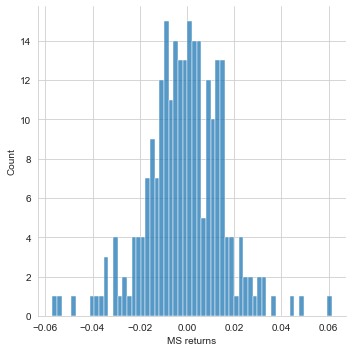

In [28]:
sn.displot(returns['2015-01-01':'2015-12-31']["MS returns"], bins= 60)

### Prices of each banks over the 10 years

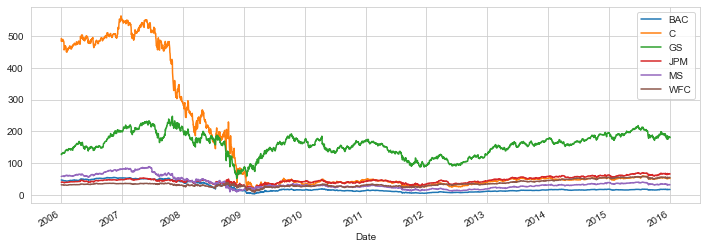

In [29]:
for i in tickers:
    banks[i]["Close"].plot(figsize=(12,4), label=i)
plt.legend()

### Moving Average on the BAC chart

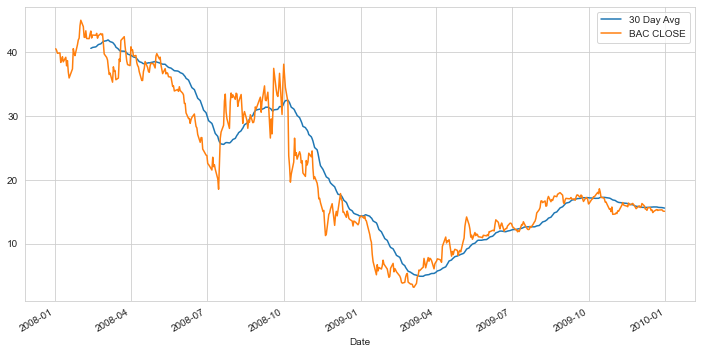

In [30]:
plt.figure(figsize=(12,6))
banks["BAC"]['Close']['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
banks["BAC"]['Close']['2008-01-01':'2010-01-01'].plot(label='BAC CLOSE')
plt.legend()

### Simple moving averages on the MS chart

In [31]:
banks["MS"]['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

### Interactive Candle Chart of Bank of America's Stock

In [32]:
banks["BAC"][['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

### Interactive Simple Moving Averages on the MS Chart

In [33]:
banks["MS"]['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

### Interactive Bollinger Band on the BAC Chart

In [34]:
banks["BAC"]['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')